<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

<div class="markdown-google-sans">
  <h2>Explore the Gemini API</h2>
  <p>The Gemini API gives you access to Gemini models created by Google DeepMind. Gemini models are built from the ground up to be multimodal, so you can reason seamlessly across text, images, code, and audio.
  </p>
  <strong>How to get started</strong>
    <ol>
      <li>Go to <a href="https://aistudio.google.com/">Google AI Studio</a> and log in with your Google account.</li>
      <li><a href="https://aistudio.google.com/app/apikey">Create an API key</a>.</li>
      <li>Use a quickstart for <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Prompting.ipynb">Python</a>, or call the REST API using <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/rest/Prompting_REST.ipynb">curl</a>.</li>
      </ol>
  <strong>Explore use cases</strong>
    <ul>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Market_a_Jet_Backpack.ipynb">Create a marketing campaign</a></li>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Audio.ipynb">Analyze audio recordings</a></li>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/System_instructions.ipynb">Use System instructions in chat</a></li>
    </ul>
  <p>To learn more, check out the <a href="https://github.com/google-gemini/cookbook">Gemini cookbook</a> or visit the <a href="https://ai.google.dev/docs/">Gemini API documentation</a>.
  </p>
</div>


In [22]:
import pandas as pd
import numpy as np

# Define the number of records
num_records = 100000

# Seed for reproducibility
np.random.seed(42)

# Sample data generation
data = {
    'user_id': np.random.randint(1, 9999, size=num_records),
    'age': np.random.randint(18, 60, size=num_records),
    'event_type': np.random.choice(['click','view'], size=num_records),
    'category': np.random.choice(['Electronics', 'Fashion', 'Sports', 'Books'], size=num_records),
    'brand': np.random.choice(['Brand_A', 'Brand_B', 'Brand_C', 'Brand_D', 'Brand_E'], size=num_records),
    'price': np.random.randint(10, 200000, size=num_records).round(2),
    'customer_rating': np.random.uniform(1, 5, size=num_records).round(1),
    'quantity': np.random.randint(1, 10, size=num_records),
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the first few records of the DataFrame
df.head()


,user_id,age,event_type,category,brand,price,customer_rating,quantity
0,7271,47,click,Books,Brand_A,29453,5.0,7
1,861,21,view,Fashion,Brand_C,190127,1.5,7
2,5391,24,click,Books,Brand_E,122348,2.4,3
3,5192,37,view,Sports,Brand_D,1285,3.9,3
4,5735,45,view,Books,Brand_C,170986,3.9,8


In [23]:
# prompt: create a dataframe with the above columns. age groups from 46-60 should prefer books category more. 18-24 should prefer sports more.

# Create a copy of the original DataFrame to avoid modifying the original
df_modified = df.copy()

# Apply age-based preferences
for index, row in df_modified.iterrows():
  if 46 <= row['age'] <= 60:
    # Increase the probability of 'Books' for ages 46-60
    if np.random.rand() < 0.6:
      df_modified.loc[index, 'category'] = 'Books'
  elif 18 <= row['age'] <= 24:
    # Increase the probability of 'Sports' for ages 18-24
    if np.random.rand() < 0.5:
      df_modified.loc[index, 'category'] = 'Sports'

# Display the first few records of the modified DataFrame
df_modified.head()


,user_id,age,event_type,category,brand,price,customer_rating,quantity
0,7271,47,click,Books,Brand_A,29453,5.0,7
1,861,21,view,Sports,Brand_C,190127,1.5,7
2,5391,24,click,Books,Brand_E,122348,2.4,3
3,5192,37,view,Sports,Brand_D,1285,3.9,3
4,5735,45,view,Books,Brand_C,170986,3.9,8


In [24]:
# prompt: from above dataframe, create a column age_label. it should have 3 labels young aged, middle aged, old aged .18-24 should be young, 25-45 should be middle aged, 46-60 should be old aged

def age_label(age):
  if 18 <= age <= 24:
    return 'young aged'
  elif 25 <= age <= 45:
    return 'middle aged'
  elif 46 <= age <= 60:
    return 'old aged'
  else:
    return 'unknown'

df_modified['age_label'] = df_modified['age'].apply(age_label)
df_modified.head()


,user_id,age,event_type,category,brand,price,customer_rating,quantity,age_label
0,7271,47,click,Books,Brand_A,29453,5.0,7,old aged
1,861,21,view,Sports,Brand_C,190127,1.5,7,young aged
2,5391,24,click,Books,Brand_E,122348,2.4,3,young aged
3,5192,37,view,Sports,Brand_D,1285,3.9,3,middle aged
4,5735,45,view,Books,Brand_C,170986,3.9,8,middle aged


In [25]:
# prompt: from above df, create column customer type high valued or low valued. this classification should be made as below.. Take a particular user_id, count the number of records for the user_id. If more than 80 percent of the records have price above 20000 then label the user_id as high valued, else low valued.

def customer_type(user_id):
  user_df = df_modified[df_modified['user_id'] == user_id]
  total_records = len(user_df)
  high_value_records = len(user_df[user_df['price'] > 50000])
  if total_records > 0 and (high_value_records / total_records) > 0.8:
    return 'high valued'
  else:
    return 'low valued'

df_modified['customer_type'] = df_modified['user_id'].apply(customer_type)
df_modified.head()


,user_id,age,event_type,category,brand,price,customer_rating,quantity,age_label,customer_type
0,7271,47,click,Books,Brand_A,29453,5.0,7,old aged,low valued
1,861,21,view,Sports,Brand_C,190127,1.5,7,young aged,high valued
2,5391,24,click,Books,Brand_E,122348,2.4,3,young aged,low valued
3,5192,37,view,Sports,Brand_D,1285,3.9,3,middle aged,low valued
4,5735,45,view,Books,Brand_C,170986,3.9,8,middle aged,low valued


In [27]:
# prompt: for above dataframe, create a new column preferences. It should be a list of 2 categories. the list should be generated as per below logic. group by user_id and do value counts of category. The list should have top 2 categories.

def get_preferences(user_id):
  user_df = df_modified[df_modified['user_id'] == user_id]
  category_counts = user_df['category'].value_counts()
  top_categories = category_counts.nlargest(2).index.tolist()
  return top_categories

df_modified['preferences'] = df_modified['user_id'].apply(get_preferences)
df_modified.head()


,user_id,age,event_type,category,brand,price,customer_rating,quantity,age_label,customer_type,preferences
0,7271,47,click,Books,Brand_A,29453,5.0,7,old aged,low valued,"[Sports, Books]"
1,861,21,view,Sports,Brand_C,190127,1.5,7,young aged,high valued,"[Books, Sports]"
2,5391,24,click,Books,Brand_E,122348,2.4,3,young aged,low valued,"[Books, Electronics]"
3,5192,37,view,Sports,Brand_D,1285,3.9,3,middle aged,low valued,"[Sports, Fashion]"
4,5735,45,view,Books,Brand_C,170986,3.9,8,middle aged,low valued,"[Books, Sports]"


In [28]:
# prompt: create csv for above data

df_modified.to_csv('customer_data.csv', index=False)


You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

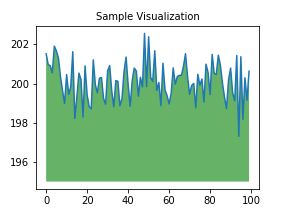

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

For example, if you find yourself waiting for **pandas** code to finish running and want to go faster, you can switch to a GPU Runtime and use libraries like [RAPIDS cuDF](https://rapids.ai/cudf-pandas) that provide zero-code-change acceleration.

To learn more about accelerating pandas on Colab, see the [10 minute guide](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb) or
 [US stock market data analysis demo](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb).

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb).

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colab](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning Crash Course

<div>

These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Intro to RAPIDS cuDF to accelerate pandas](https://nvda.ws/rapids-cudf)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
